# 손동작 분류 대회

## 필요 라이브러리 설치

In [32]:
!pip install optuna

## 파일 불러오기 및 결측치 확인

In [33]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/Colab Notebooks/Data/Hand_Gesture_classification/' # 구글 클라우드 데이터 위치

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import numpy as np
import pandas as pd

In [35]:
tmp_train=pd.read_csv(path+'train.csv').set_index('id')
tmp_test=pd.read_csv(path+'test.csv').set_index('id')
submission=pd.read_csv(path+'sample_submission.csv').set_index('id')

In [36]:
tmp_train

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
id,,,,,,,,,,,,,,,,,,,,,
1,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,4.145636,...,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822,1
2,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,-4.060134,...,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421,1
3,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,-5.975194,...,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090,0
4,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,2.099845,...,-2.126170,-1.035526,2.178769,10.032723,-1.010897,-3.912848,-2.980338,-12.983597,-3.001077,1
5,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,-4.000506,...,-2.051761,10.917567,1.905335,-13.004707,17.169552,2.105194,3.967986,11.861657,-27.088846,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,-3.971043,39.913391,16.034626,-19.067697,8.061361,-70.916786,-39.937026,12.834223,-21.937973,14.942994,...,3.086417,-4.954858,-11.106802,-37.863399,31.069292,-4.097017,-13.095192,-5.150284,8.016265,3
2332,-3.011710,-4.060355,-1.046067,4.178137,-2.003243,-2.895017,-2.766757,-29.099123,-4.208953,-4.793855,...,6.871938,-0.134367,-0.867018,23.892336,-11.977934,1.984203,0.891666,28.822082,-0.878670,3
2333,-9.001824,5.985711,-8.146347,-10.902201,5.102105,8.133692,32.877614,-3.017438,-3.174442,-5.724941,...,-7.952857,2.049467,-5.825790,-37.989569,15.014132,1.160272,-11.135889,-7.035763,-0.930067,3


In [37]:
tmp_train.isna().sum()

sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_15    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
sensor_20    0
sensor_21    0
sensor_22    0
sensor_23    0
sensor_24    0
sensor_25    0
sensor_26    0
sensor_27    0
sensor_28    0
sensor_29    0
sensor_30    0
sensor_31    0
sensor_32    0
target       0
dtype: int64

## train 데이터 시각화 및 데이터 이해(EDA)

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

<BarContainer object of 4 artists>

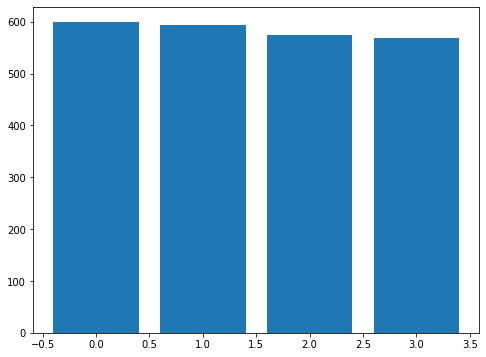

In [39]:
plt.figure(figsize=(8,6))
plt.bar(sorted(tmp_train['target'].unique()),tmp_train['target'].value_counts().values)

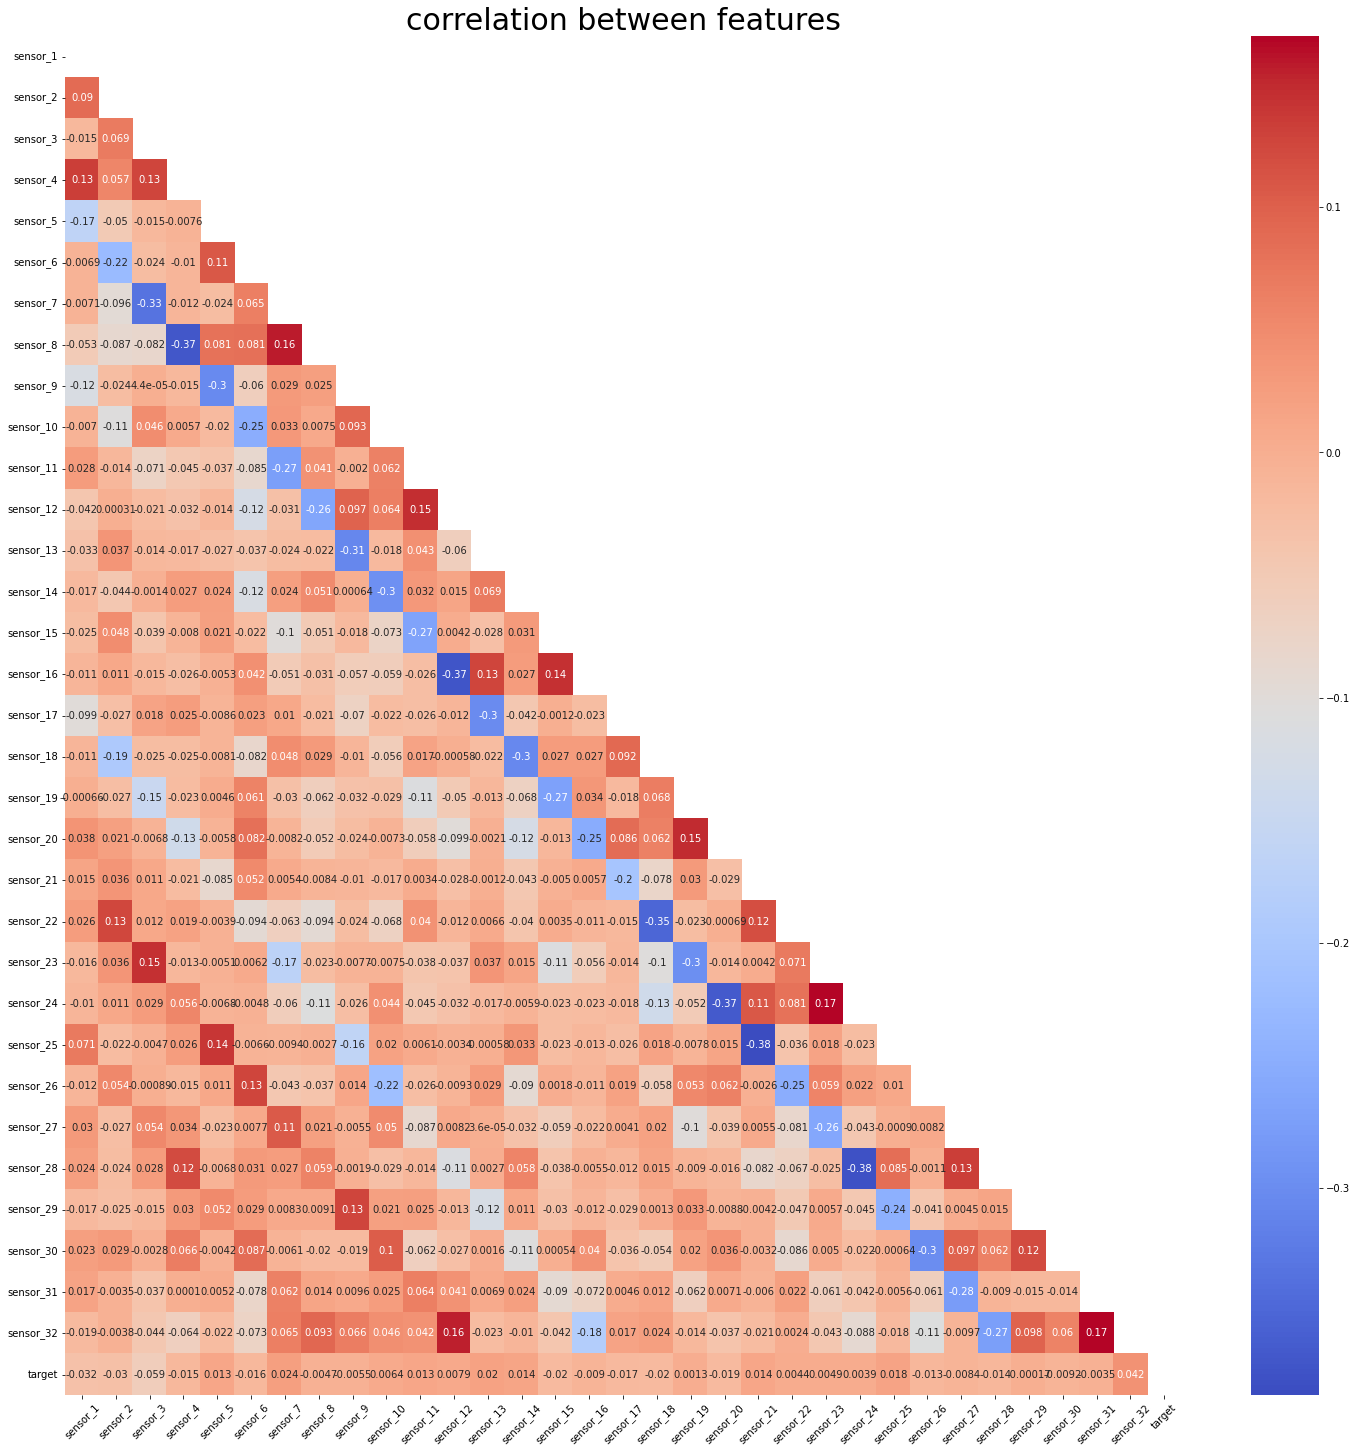

In [ ]:
plt.figure(figsize=(25,25))

heat_table = tmp_train.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=10, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=10)
plt.title('correlation between features', fontsize=30)
plt.show()

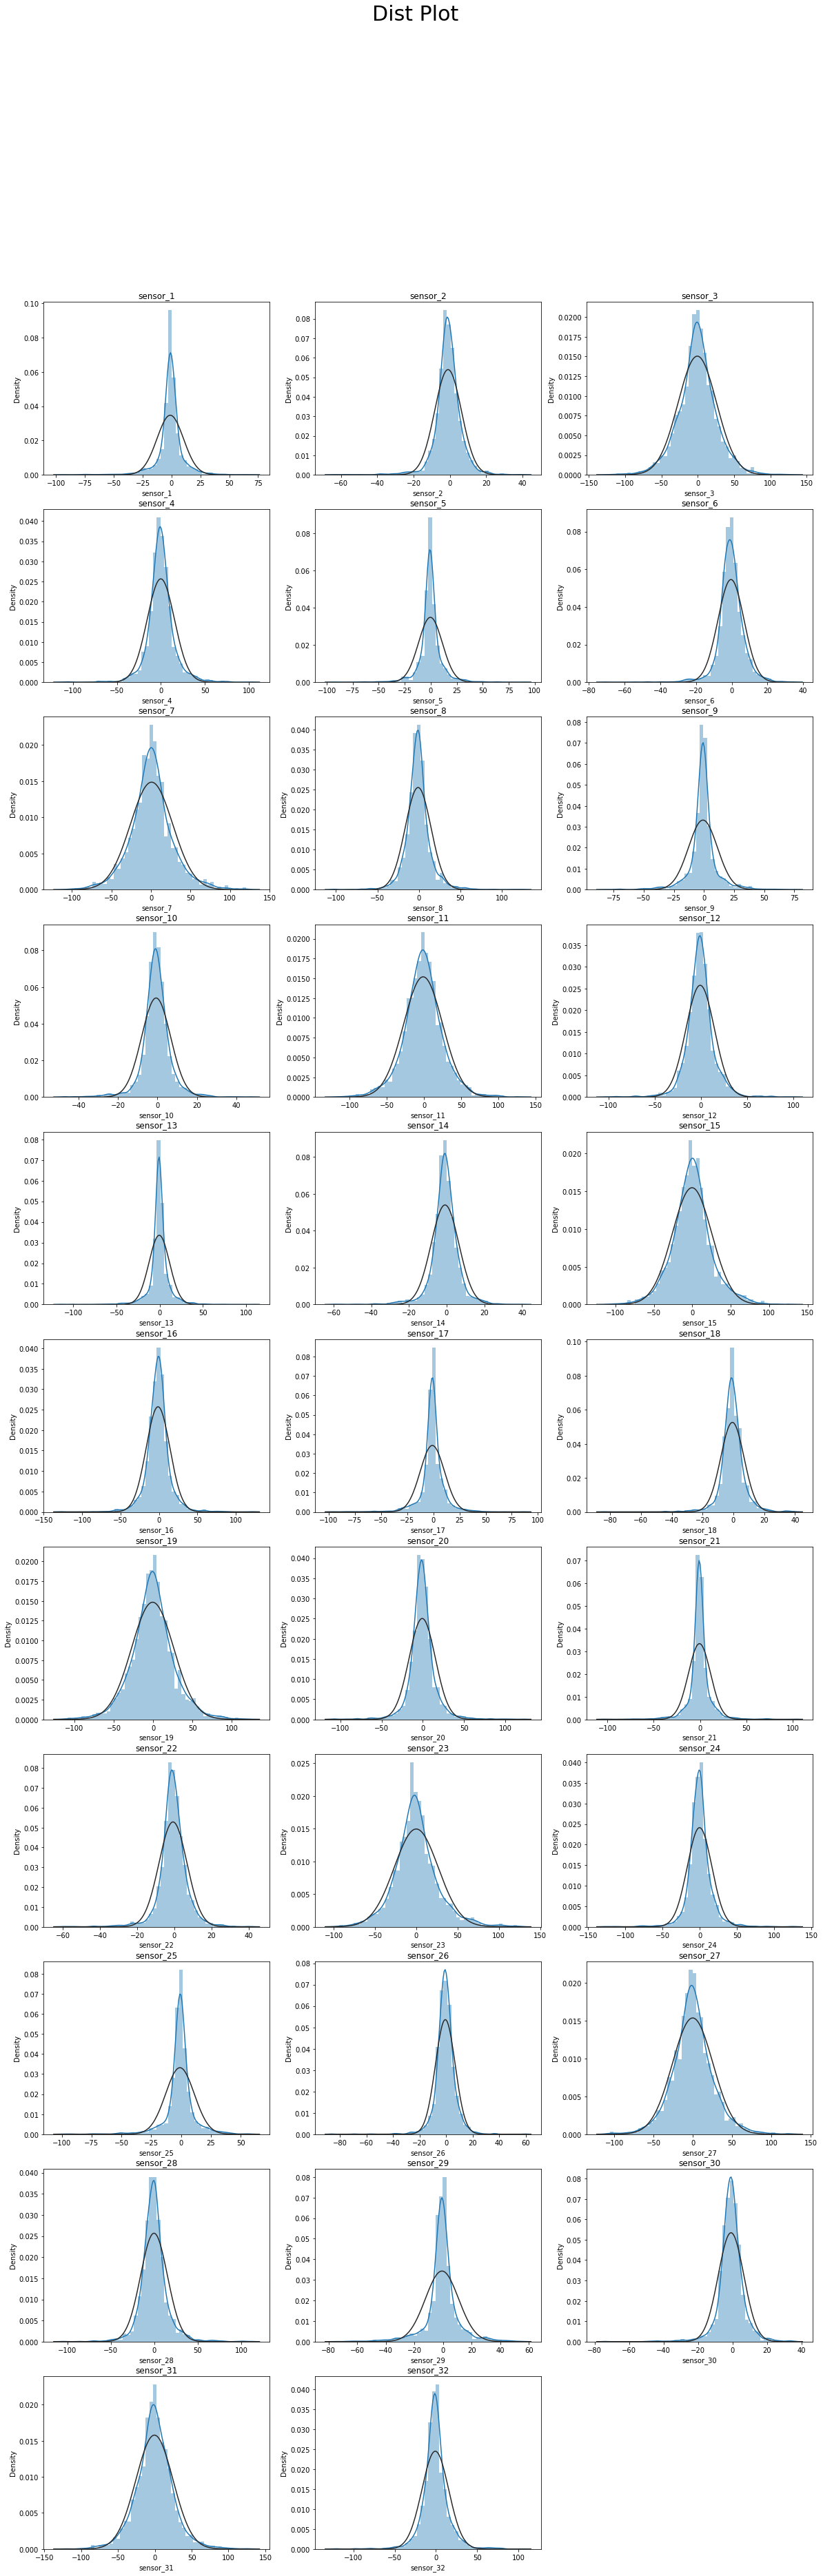

In [44]:
plt.figure(figsize=(20,60))
plt.suptitle('Dist Plot',fontsize=30)
for i in range(len(tmp_train.columns)-1):
  plt.subplot(11,3,i+1)
  plt.title(tmp_train.columns[i])
  sns.distplot(tmp_train[tmp_train.columns[i]], fit=stats.norm)
plt.show()


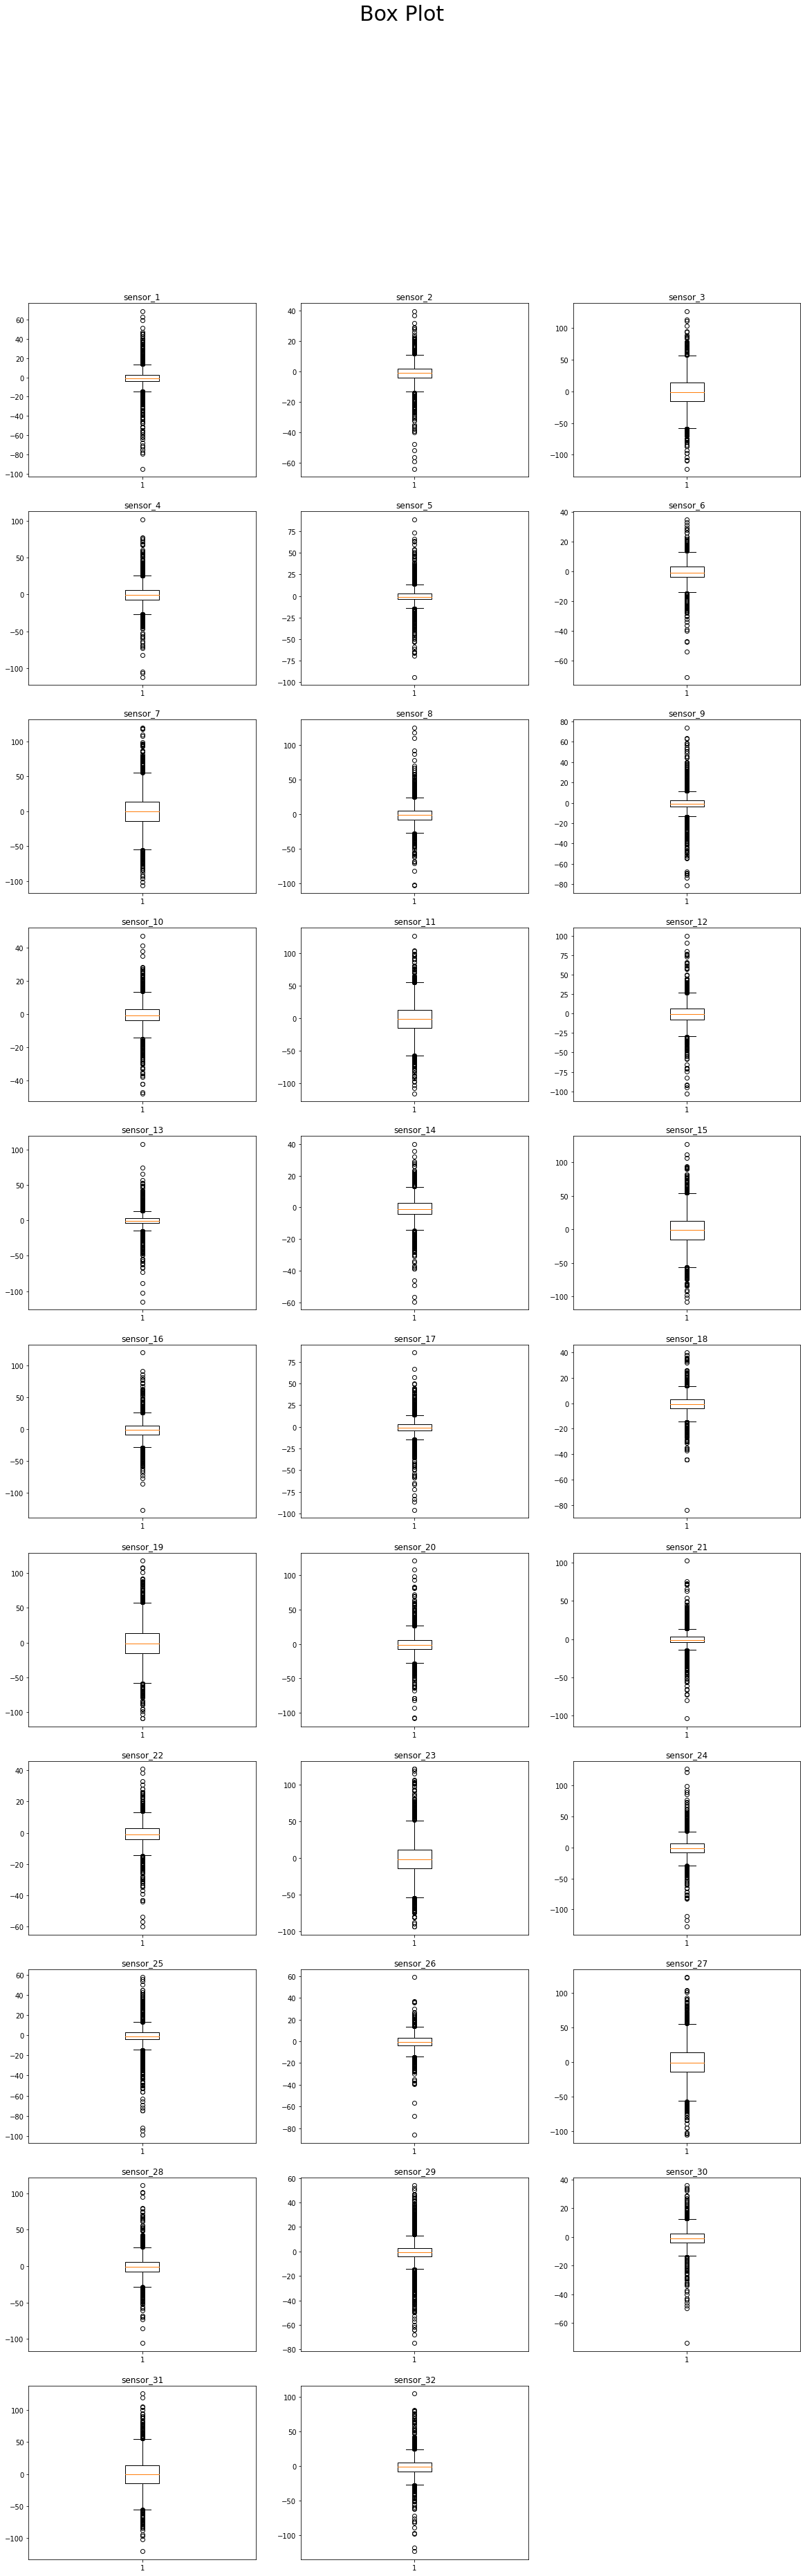

In [ ]:
plt.figure(figsize=(20,60))
plt.suptitle('Box Plot',fontsize=30)
for i in range(len(tmp_train.columns)-1):
    plt.subplot(11,3,i+1)
    plt.title(tmp_train.columns[i])
    plt.boxplot(tmp_train[tmp_train.columns[i]])
plt.show()

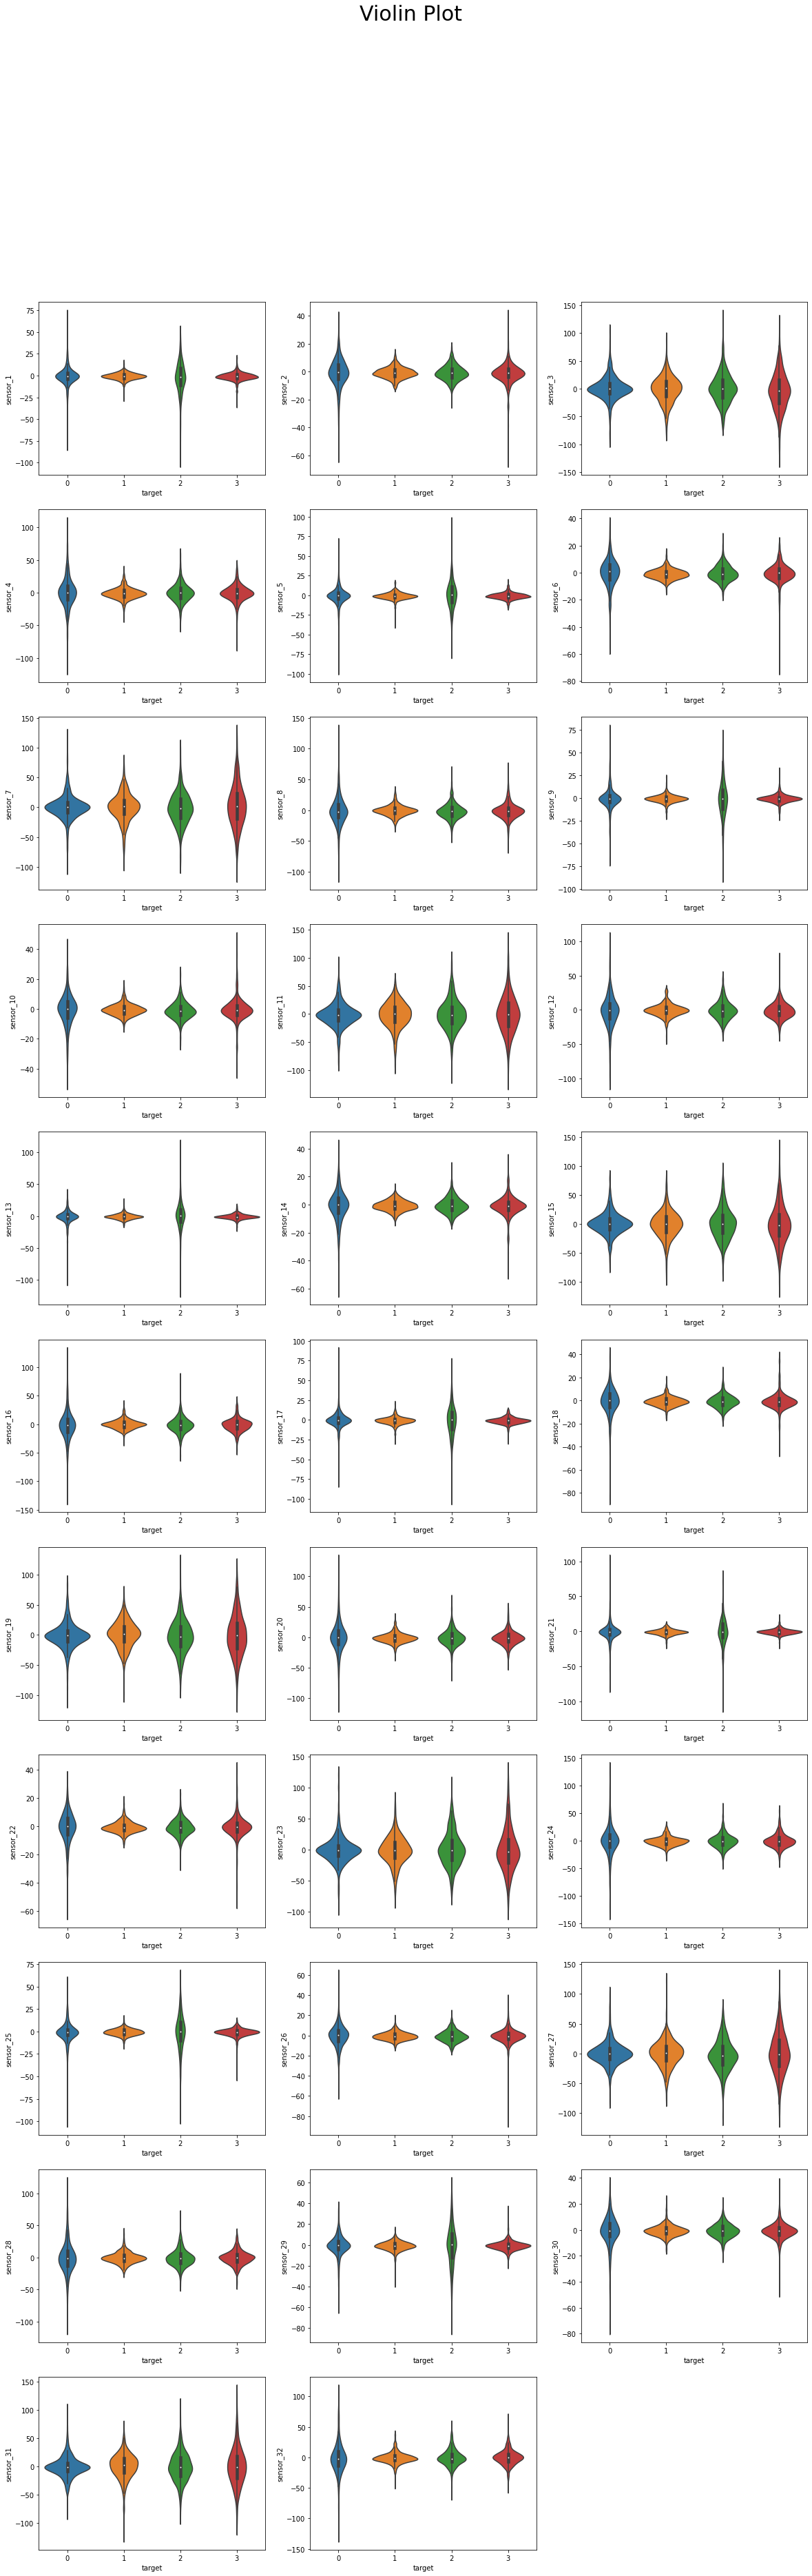

In [ ]:
plt.figure(figsize=(20,60))
plt.suptitle('Violin Plot',fontsize=30)
for i in range(len(tmp_train.columns)-1):
    plt.subplot(11,3,i+1)
    #plt.title(yn_col[i],fontsize=10)
    plt.ylabel(tmp_train.columns[i])
    plt.xlabel('target')
    sns.violinplot(y=tmp_train[tmp_train.columns[i]],x=tmp_train['target'],ci=None)
plt.show()

## 파라미터 튜닝 및 모델 생성 라이브러리 선언

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트
from sklearn.metrics import accuracy_score

## 데이터 분할 및 파라미터 튜닝

In [ ]:
x_train=tmp_train.iloc[:,:-1]
y_train=tmp_train.target

In [ ]:
def objective(trial):
    op_x_train,op_x_val,op_y_train,op_y_val=train_test_split(x_train,y_train,test_size=0.2,shuffle=True,stratify=y_train,random_state=41)
    
    
    param={
        'random_state':41,
        'max_depth' : trial.suggest_int('max_depth', 1, 40),
        'max_leaf_nodes':trial.suggest_int('max_leaf_nodes',2,1000),
        "n_estimators": trial.suggest_int("n_estimators", 50, 500)
    }
    
        
    rf = RandomForestClassifier(**param,
                             )

    rf.fit(op_x_train, op_y_train)
    
    accuracy = accuracy_score(op_y_val, rf.predict(op_x_val))
    return accuracy

In [ ]:
study = optuna.create_study(direction = "maximize", sampler = TPESampler(seed=41))
study.optimize(objective, n_trials = 500)

[I 2022-03-14 06:19:49,577] A new study created in memory with name: no-name-39b63848-2a82-4b03-9b84-d1fa2ce6cdd7
[I 2022-03-14 06:19:54,529] Trial 0 finished with value: 0.721627408993576 and parameters: {'max_depth': 11, 'max_leaf_nodes': 48, 'n_estimators': 355}. Best is trial 0 with value: 0.721627408993576.
[I 2022-03-14 06:19:55,603] Trial 1 finished with value: 0.47751605995717344 and parameters: {'max_depth': 2, 'max_leaf_nodes': 118, 'n_estimators': 322}. Best is trial 0 with value: 0.721627408993576.
[I 2022-03-14 06:19:59,283] Trial 2 finished with value: 0.715203426124197 and parameters: {'max_depth': 8, 'max_leaf_nodes': 669, 'n_estimators': 463}. Best is trial 0 with value: 0.721627408993576.
[I 2022-03-14 06:20:01,236] Trial 3 finished with value: 0.7601713062098501 and parameters: {'max_depth': 17, 'max_leaf_nodes': 333, 'n_estimators': 177}. Best is trial 3 with value: 0.7601713062098501.
[I 2022-03-14 06:20:03,213] Trial 4 finished with value: 0.7130620985010707 and p

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
optuna.visualization.plot_optimization_history(study)

## 모델 생성(교차검증 이용)

In [ ]:
cv=StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=41
)

models=[]
scores=[]
for train_idx,val_idx in cv.split(x_train,y_train):
    model=RandomForestClassifier(**study.best_params)
    model.fit(x_train.iloc[train_idx],y_train.iloc[train_idx])
    models.append(model)
    scores.append(accuracy_score(y_train.iloc[val_idx],model.predict(x_train.iloc[val_idx])))
print(scores)

[0.7944325481798715, 0.7323340471092077, 0.7665952890792291, 0.7751605995717344, 0.7794432548179872]


## 모델 앙상블 과정

In [ ]:
# 가중평균 앙상블
#result_proba=np.sum([models[i].predict_proba(tmp_test)*scores[i]/sum(scores) for i in range(len(models))],axis=0)

In [ ]:
# 단순평균 앙상블
result_proba=np.mean([models[i].predict_proba(tmp_test) for i in range(len(models))],axis=0)

In [ ]:
result_proba

array([[0.46004057, 0.19187359, 0.13303053, 0.21505531],
       [0.47062392, 0.13417443, 0.16680793, 0.22839373],
       [0.12093916, 0.6007084 , 0.06723709, 0.21111535],
       ...,
       [0.37828917, 0.05766764, 0.48153692, 0.08250628],
       [0.59205411, 0.10671901, 0.18070104, 0.12052584],
       [0.08264383, 0.2059318 , 0.02939679, 0.68202757]])

## 제출 파일 생성

In [ ]:
submission['target']=np.argmax(result_proba,axis=1)

In [ ]:
submission.to_csv(path+'submission.csv')